In [1]:
## import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso, Ridge, RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics


In [2]:
## load the data set
pd.set_option('display.max_columns', None)
data = pd.read_csv('Flight_data.csv')
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [3]:
##change the display format
pd.options.display.float_format = '{:.2f}'.format
data.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,DEST,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Dew Point,Humidity,Wind,Wind Speed,Wind Gust,Pressure,Condition,sch_dep,sch_arr,TAXI_OUT
0,11,1,5,B6,N828JB,CHS,-1,124,636,324,323,448,48,34,58,W,25,38,29.86,Fair / Windy,9,17,14
1,11,1,5,B6,N992JB,LAX,-7,371,2475,340,333,531,48,34,58,W,25,38,29.86,Fair / Windy,9,17,15
2,11,1,5,B6,N959JB,FLL,40,181,1069,301,341,482,48,34,58,W,25,38,29.86,Fair / Windy,9,17,22
3,11,1,5,B6,N999JQ,MCO,-2,168,944,345,343,513,48,34,58,W,25,38,29.86,Fair / Windy,9,17,12
4,11,1,5,DL,N880DN,ATL,-4,139,760,360,356,499,46,32,58,W,24,35,29.91,Fair / Windy,9,17,13


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28820 entries, 0 to 28819
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MONTH              28820 non-null  int64  
 1   DAY_OF_MONTH       28820 non-null  int64  
 2   DAY_OF_WEEK        28820 non-null  int64  
 3   OP_UNIQUE_CARRIER  28820 non-null  object 
 4   TAIL_NUM           28820 non-null  object 
 5   DEST               28820 non-null  object 
 6   DEP_DELAY          28820 non-null  int64  
 7   CRS_ELAPSED_TIME   28820 non-null  int64  
 8   DISTANCE           28820 non-null  int64  
 9   CRS_DEP_M          28820 non-null  int64  
 10  DEP_TIME_M         28820 non-null  int64  
 11  CRS_ARR_M          28820 non-null  int64  
 12  Temperature        28820 non-null  int64  
 13  Dew Point          28820 non-null  object 
 14  Humidity           28820 non-null  int64  
 15  Wind               28818 non-null  object 
 16  Wind Speed         288

In [5]:
## Check for missing values
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 2
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [6]:
# Calculate the mode of the wind variable
mode = data['Wind'].mode().values[0]
# Replace missing values in wind variable with mode
data['Wind'].fillna(mode, inplace=True)


In [7]:
## Check for missing values
data.isnull().sum()

MONTH                0
DAY_OF_MONTH         0
DAY_OF_WEEK          0
OP_UNIQUE_CARRIER    0
TAIL_NUM             0
DEST                 0
DEP_DELAY            0
CRS_ELAPSED_TIME     0
DISTANCE             0
CRS_DEP_M            0
DEP_TIME_M           0
CRS_ARR_M            0
Temperature          0
Dew Point            0
Humidity             0
Wind                 0
Wind Speed           0
Wind Gust            0
Pressure             0
Condition            0
sch_dep              0
sch_arr              0
TAXI_OUT             0
dtype: int64

In [8]:
## statistical summery of the dataset 
data.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
count,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00,28820.00
mean,7.89,16.02,4.01,6.37,225.29,1267.75,831.00,828.93,910.87,41.49,57.73,12.37,5.54,30.09,31.09,28.43,20.86
std,4.99,8.75,1.99,38.74,119.48,889.34,299.40,305.86,345.41,8.04,23.47,6.26,11.89,0.30,9.51,8.26,6.85
min,1.00,1.00,1.00,-22.00,57.00,94.00,301.00,1.00,1.00,17.00,0.00,0.00,0.00,29.20,0.00,0.00,5.00
25%,1.00,8.00,2.00,-6.00,124.00,483.00,545.00,542.00,667.00,36.00,46.00,8.00,0.00,29.88,26.00,21.00,16.00
50%,11.00,16.00,4.00,-3.00,188.00,1029.00,856.00,854.00,918.00,42.00,59.00,12.00,0.00,30.11,30.00,30.00,19.00
75%,12.00,24.00,6.00,2.00,365.00,2248.00,1095.00,1097.00,1193.00,47.00,74.00,16.00,0.00,30.32,37.00,35.00,25.00
max,12.00,31.00,7.00,1276.00,697.00,4983.00,1439.00,1440.00,1439.00,68.00,97.00,36.00,49.00,30.75,55.00,46.00,41.00


In [9]:
## Exploratory data analysis
## correlation matrix
corr_mat = data.corr(numeric_only=True)
corr_mat

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,CRS_DEP_M,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr,TAXI_OUT
MONTH,1.00,-0.01,0.03,0.05,-0.02,-0.00,0.00,0.00,-0.01,0.14,0.01,-0.04,-0.05,-0.09,-0.01,-0.02,0.02
DAY_OF_MONTH,-0.01,1.00,-0.03,-0.04,0.00,-0.00,0.00,0.00,0.01,-0.13,0.10,-0.09,-0.09,0.02,-0.00,0.00,-0.02
DAY_OF_WEEK,0.03,-0.03,1.00,-0.01,0.00,0.00,0.01,0.01,-0.00,0.01,0.00,0.10,0.13,0.10,0.02,0.01,0.03
DEP_DELAY,0.05,-0.04,-0.01,1.00,-0.03,-0.03,0.10,0.07,0.04,-0.03,-0.01,0.07,0.04,-0.06,-0.07,-0.01,0.03
CRS_ELAPSED_TIME,-0.02,0.00,0.00,-0.03,1.00,0.99,-0.03,-0.02,0.04,-0.02,0.02,-0.01,-0.01,0.01,0.08,-0.07,0.07
DISTANCE,-0.00,-0.00,0.00,-0.03,0.99,1.00,-0.04,-0.03,0.01,-0.01,0.02,-0.01,-0.01,0.01,0.06,-0.09,0.06
CRS_DEP_M,0.00,0.00,0.01,0.10,-0.03,-0.04,1.00,0.95,0.45,0.09,0.00,0.01,-0.01,-0.01,-0.03,0.50,0.04
DEP_TIME_M,0.00,0.00,0.01,0.07,-0.02,-0.03,0.95,1.00,0.47,0.10,-0.01,0.01,-0.01,-0.01,0.03,0.54,0.06
CRS_ARR_M,-0.01,0.01,-0.00,0.04,0.04,0.01,0.45,0.47,1.00,0.10,-0.03,0.01,0.00,-0.01,0.15,0.42,0.07
Temperature,0.14,-0.13,0.01,-0.03,-0.02,-0.01,0.09,0.10,0.10,1.00,0.05,0.01,-0.04,-0.38,-0.02,0.08,-0.07


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

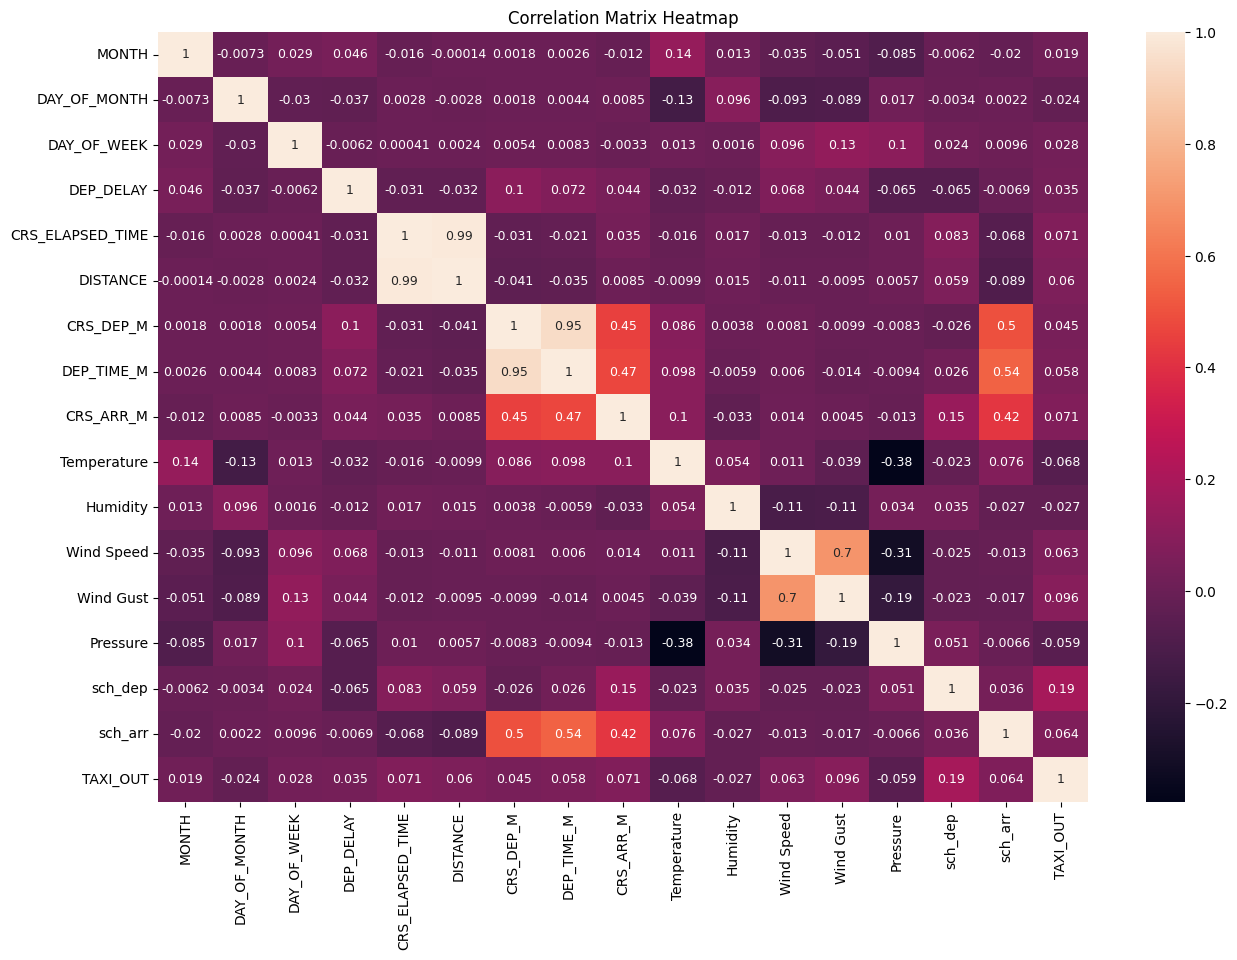

In [10]:
## plot the heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr_mat, annot=True, annot_kws={'size': 9})
plt.title("Correlation Matrix Heatmap", loc="center")

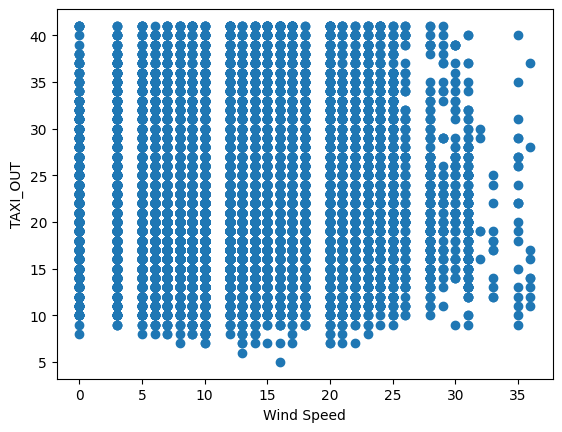

In [11]:
## scatter plot to see the relationship
plt.scatter(data['Wind Speed'] , data['TAXI_OUT'])
## label of the axis
plt.xlabel('Wind Speed')
plt.ylabel('TAXI_OUT')
plt.show()

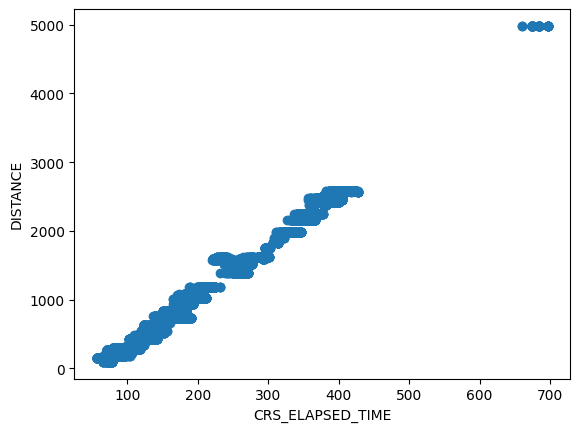

In [79]:
## scatter plot to see the relationship
plt.scatter(data['CRS_ELAPSED_TIME'] , data['DISTANCE'])
## label of the axis
plt.xlabel('CRS_ELAPSED_TIME')
plt.ylabel('DISTANCE')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

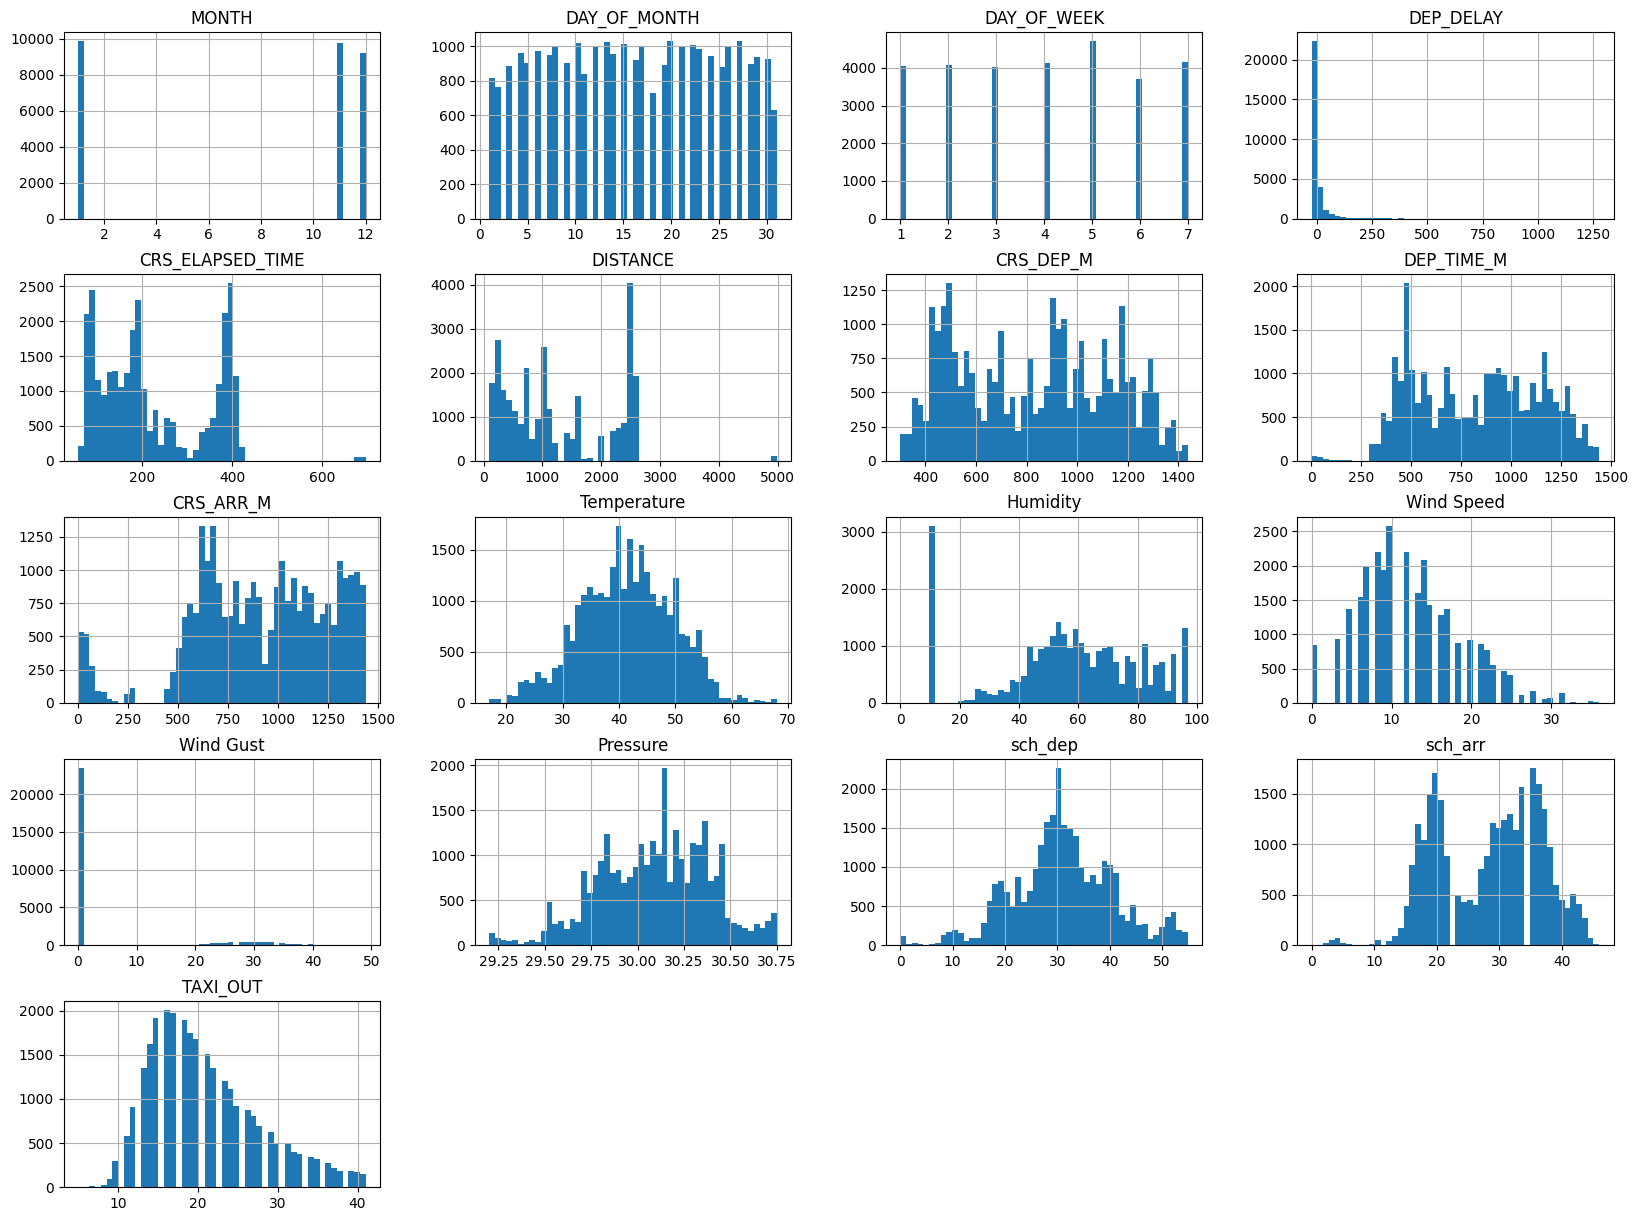

In [12]:
## Histrogram plot to see the relationship
data.hist(bins=50, figsize=(20, 15))
plt.show

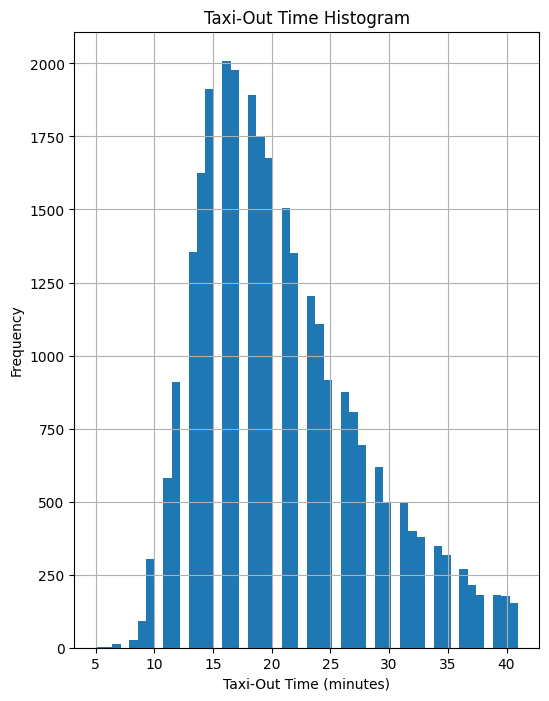

In [13]:
## Histrogram plot to see the relationship
data['TAXI_OUT'].hist(bins=50, figsize=(6, 8))
plt.title('Taxi-Out Time Histogram')
plt.xlabel('Taxi-Out Time (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [14]:
## Model building
# Specify the X and y variables(independent and dependent variable)
X = data[['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','CRS_ELAPSED_TIME','DISTANCE','DEP_TIME_M','CRS_ARR_M','Temperature','Humidity','Dew Point','Wind Speed','Wind Gust','Pressure','sch_dep','sch_arr']]
y = data.iloc[:, 22]

In [15]:
X

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Dew Point,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
0,11,1,5,-1,124,636,323,448,48,58,34,25,38,29.86,9,17
1,11,1,5,-7,371,2475,333,531,48,58,34,25,38,29.86,9,17
2,11,1,5,40,181,1069,341,482,48,58,34,25,38,29.86,9,17
3,11,1,5,-2,168,944,343,513,48,58,34,25,38,29.86,9,17
4,11,1,5,-4,139,760,356,499,46,58,32,24,35,29.91,9,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28815,1,31,5,2,57,150,1372,1427,39,96,38,6,0,30.18,20,32
28816,1,31,5,2,75,187,1392,25,39,96,38,6,0,30.18,19,23
28817,1,31,5,283,392,2422,1408,1337,39,96,38,6,0,30.18,19,23
28818,1,31,5,5,224,1598,1422,261,39,96,38,6,0,30.18,19,23


In [16]:
y

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

In [17]:
## splitting out data
## 8o% training 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [18]:
X_train.shape

(23056, 16)

In [19]:
X_train

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Dew Point,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
20654,1,6,1,-4,189,1028,854,1047,44,51,27,15,0,29.95,26,42
5145,11,16,6,19,134,541,1054,1169,34,32,7,7,0,30.45,25,33
7954,11,25,1,-5,385,2454,420,630,42,76,35,9,0,29.80,34,29
17345,12,26,4,-1,257,1391,1169,1367,45,82,40,10,0,30.37,41,30
1966,11,7,4,-7,140,636,516,663,54,45,33,16,0,30.21,52,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20414,1,5,7,76,184,740,1071,1119,37,50,20,15,23,29.99,30,34
27516,1,28,2,-10,141,541,470,621,39,62,27,21,25,29.80,37,37
9526,11,30,6,-12,114,427,618,744,39,36,14,15,0,30.08,19,22
9771,12,1,7,-10,124,636,311,445,30,56,16,6,0,30.01,11,24


In [20]:
X_test

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,DEP_DELAY,CRS_ELAPSED_TIME,DISTANCE,DEP_TIME_M,CRS_ARR_M,Temperature,Humidity,Dew Point,Wind Speed,Wind Gust,Pressure,sch_dep,sch_arr
9362,11,29,5,-8,391,2422,1112,1331,37,62,25,13,0,30.15,36,30
23840,1,16,4,21,239,1598,563,841,48,63,36,33,47,29.88,38,17
24617,1,19,7,-4,395,2422,542,761,45,60,32,18,28,29.73,39,16
24899,1,20,1,-7,395,2475,502,724,23,53,8,21,29,30.25,47,17
2007,11,7,4,1,175,944,661,835,55,67,44,12,0,30.11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25685,1,22,3,2,169,828,901,1068,36,55,21,8,0,30.42,31,36
376,11,2,6,-7,184,1041,561,752,48,54,32,5,0,30.23,36,11
10922,12,5,4,-5,142,589,990,1137,40,55,25,25,33,29.91,30,31
7106,11,22,5,-3,71,94,777,851,50,93,48,21,0,29.69,19,25


In [21]:
##Preprocessing data
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
X_train

array([[-1.38769962e+00, -1.14543991e+00, -1.51111751e+00, ...,
        -4.80870529e-01, -5.39867715e-01,  1.64127732e+00],
       [ 6.18583726e-01, -1.18614092e-03,  1.00221553e+00, ...,
         1.21091039e+00, -6.44675567e-01,  5.52910937e-01],
       [ 6.18583726e-01,  1.02864225e+00, -1.51111751e+00, ...,
        -9.88404805e-01,  2.98595096e-01,  6.91925426e-02],
       ...,
       [ 6.18583726e-01,  1.60076913e+00,  1.00221553e+00, ...,
        -4.10074898e-02, -1.27352268e+00, -7.77314647e-01],
       [ 8.19212061e-01, -1.71756679e+00,  1.50488214e+00, ...,
        -2.77856819e-01, -2.11198549e+00, -5.35455450e-01],
       [ 8.19212061e-01, -1.25986528e+00, -3.11768411e-03, ...,
        -1.08678727e-01, -4.35059864e-01,  5.52910937e-01]])

In [23]:
X_test

array([[ 6.18583726e-01,  1.48634376e+00,  4.99548923e-01, ...,
         1.95841839e-01,  5.08210798e-01,  1.90122141e-01],
       [-1.38769962e+00, -1.18614092e-03, -3.11768411e-03, ...,
        -7.17719858e-01,  7.17826501e-01, -1.38196264e+00],
       [-1.38769962e+00,  3.42089989e-01,  1.50488214e+00, ...,
        -1.22525413e+00,  8.22634353e-01, -1.50289224e+00],
       ...,
       [ 8.19212061e-01, -1.25986528e+00, -3.11768411e-03, ...,
        -6.16213003e-01, -1.20636310e-01,  3.11051740e-01],
       [ 6.18583726e-01,  6.85366119e-01,  4.99548923e-01, ...,
        -1.36059661e+00, -1.27352268e+00, -4.14525851e-01],
       [ 6.18583726e-01, -8.02163778e-01,  1.00221553e+00, ...,
         3.65019931e-01,  9.27442204e-01, -4.14525851e-01]])

In [24]:
#Train our model 
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 

LinearRegression()

In [25]:
## Make predictions based on the trained model
y_pred = lin_reg.predict(X_test)

In [26]:
y_pred

array([22.41161676, 22.07078776, 22.84360683, ..., 23.04812178,
       18.7257535 , 22.41527306])

In [27]:
## Create a dataframe that shows the predicted and actual value
pd.DataFrame({'Actual_TAXI_OUT': y_test, 'Predicted_TAXI_OUT': y_pred}) 

,Actual_TAXI_OUT,Predicted_TAXI_OUT
9362,23,22.41
23840,14,22.07
24617,22,22.84
24899,19,24.74
2007,20,18.56
...,...,...
25685,18,20.04
376,16,19.04
10922,34,23.05
7106,17,18.73


In [28]:
## Model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## R-squared 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.278477567070799
MSE: 43.87153709099075
RMSE: 6.623559246431691
R2: 0.08466644253552857


In [29]:
##  Define Lasso and Ridge model
model_laso = Lasso(alpha=0.44)
model_ridge = Ridge(alpha=0.10)

##train our model
model_laso.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [30]:
## create a new data to predict
new = data.loc[9362, ['MONTH','DAY_OF_MONTH','DAY_OF_WEEK','DEP_DELAY','CRS_ELAPSED_TIME','DISTANCE','DEP_TIME_M','CRS_ARR_M','Temperature','Humidity','Dew Point','Wind Speed','Wind Gust','Pressure','sch_dep','sch_arr']]

In [31]:
# make predictions for laso
new_data = np.array([new])
pred_laso = model_laso.predict(new_data)

In [32]:
pred_laso

array([51.55182262])

In [33]:
# make predictions for ridge
new_data = np.array([new])
pred_ridge = model_ridge.predict(new_data)

In [34]:
pred_ridge

array([-5673.14504092])

In [35]:
## make predictions for lasso
pred_laso = model_laso.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_laso})

,Actual,Predicted
9362,23,21.20
23840,14,22.29
24617,22,22.01
24899,19,22.82
2007,20,20.61
...,...,...
25685,18,20.75
376,16,21.18
10922,34,21.30
7106,17,19.62


In [36]:
## Model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## R-squared 
print('MAE:', metrics.mean_absolute_error(y_test, pred_laso))
print('MSE:', metrics.mean_squared_error(y_test, pred_laso))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_laso)))
print('R2:', metrics.r2_score(y_test, pred_laso))

MAE: 5.428616740433855
MSE: 46.19426665870781
RMSE: 6.7966364224304225
R2: 0.036205128908954665


In [37]:
## make predictions for ridge
pred_ridge = model_ridge.predict(X_test)
pd.DataFrame({'Actual': y_test, 'Predicted': pred_ridge})

,Actual,Predicted
9362,23,22.41
23840,14,22.07
24617,22,22.84
24899,19,24.74
2007,20,18.56
...,...,...
25685,18,20.04
376,16,19.04
10922,34,23.05
7106,17,18.73


In [38]:
## Model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## R-squared 
print('MAE:', metrics.mean_absolute_error(y_test, pred_ridge))
print('MSE:', metrics.mean_squared_error(y_test, pred_ridge))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_ridge)))
print('R2:', metrics.r2_score(y_test, pred_ridge))

MAE: 5.2784800140825805
MSE: 43.87154788702349
RMSE: 6.623560061403798
R2: 0.0846662172876409


In [39]:
## tunning alpha for a Ridge regression model using cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=32)
##define model
model = RidgeCV(alphas=(0.5,1,0.01),cv =cv, scoring='neg_mean_absolute_error')
## Fit the model
model.fit(X_train,y_train)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=32),
        scoring='neg_mean_absolute_error')

In [40]:
##summarize the choosen configuration
print('alpha: %.2f' %model.alpha_)

alpha: 0.01


In [41]:
## 2nd Linear Regression Model

In [42]:
## model building
# Specify the X and y variables(independent and dependent variable)
X = data.iloc[:,[16,17]]
y = data.iloc[:, 22]

In [43]:
X

,Wind Speed,Wind Gust
0,25,38
1,25,38
2,25,38
3,25,38
4,24,35
...,...,...
28815,6,0
28816,6,0
28817,6,0
28818,6,0


In [44]:
y

0        14
1        15
2        22
3        12
4        13
         ..
28815    19
28816    22
28817    21
28818    13
28819    15
Name: TAXI_OUT, Length: 28820, dtype: int64

In [45]:
## splitting out data
## 8o% training 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32)

In [46]:
X_train

,Wind Speed,Wind Gust
20654,15,0
5145,7,0
7954,9,0
17345,10,0
1966,16,0
...,...,...
20414,15,23
27516,21,25
9526,15,0
9771,6,0


In [47]:
## Preprocessing data
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [48]:
X_train

array([[ 0.42596374, -0.46433733],
       [-0.85410664, -0.46433733],
       [-0.53408905, -0.46433733],
       ...,
       [ 0.42596374, -0.46433733],
       [-1.01411544, -0.46433733],
       [ 0.58597254, -0.46433733]])

In [49]:
#Train our model 
## Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train) 

LinearRegression()

In [50]:
## Make predictions based on the trained model
y_pred = lin_reg.predict(X_test)

In [51]:
y_pred

array([20.54548075, 23.14505928, 22.10833902, ..., 22.37490328,
       20.52908346, 20.54548075])

In [52]:
## Create a dataframe that shows the predicted and actual value
pd.DataFrame({'Actual_TAXI_OUT': y_test, 'Predicted_TAXI_OUT': y_pred}) 

,Actual_TAXI_OUT,Predicted_TAXI_OUT
9362,23,20.55
23840,14,23.15
24617,22,22.11
24899,19,22.16
2007,20,20.55
...,...,...
25685,18,20.56
376,16,20.56
10922,34,22.37
7106,17,20.53


In [53]:
## Model evaluation
## Mean Absolute error
## Mean square error
## Root mean square error
## R-squared 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.537122429756312
MSE: 47.50876526345589
RMSE: 6.892660245758229
R2: 0.0087794957092181


In [54]:
##  Define Lasso and Ridge model
model_laso = Lasso(alpha=0.99)
model_ridge = Ridge(alpha=1.00)

##train our model
model_laso.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)

Ridge()

In [55]:
## create a new data to predict
new = data.iloc[18780,[16,17]]

In [56]:
# make predictions
prediction_laso = model_laso.predict([new])
prediction_ridge = model_ridge.predict([new])

# summarize predictions
print('Predicted (laso): %.4f' % prediction_laso.item())  # Convert to scalar
print('Predicted (ridge): %.4f' % prediction_ridge.item())  

Predicted (laso): 20.8563
Predicted (ridge): 20.7031


In [57]:
## tunning alpha for a Ridge regression model using cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=32)
##define model
model = RidgeCV(alphas=(0.5,1,0.01),cv =cv, scoring='neg_mean_absolute_error')
## Fit the model
model.fit(X_train,y_train)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=32),
        scoring='neg_mean_absolute_error')

In [58]:
##summarize the choosen configuration
print('alpha: %.2f' %model.alpha_)

alpha: 0.01


In [59]:
## 3rd regression model

In [60]:
## model building
# Specify the X and y variables(independent and dependent variable)
X = data.iloc[:, 20].values.reshape(-1, 1)
y = data.iloc[:, 22].values.reshape(-1, 1)

In [61]:
X

array([[ 9],
       [ 9],
       [ 9],
       ...,
       [19],
       [19],
       [19]], dtype=int64)

In [62]:
## Splitting our data
##80% training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 32)

In [63]:
X_train

array([[26],
       [25],
       [34],
       ...,
       [19],
       [11],
       [27]], dtype=int64)

In [64]:
X_test

array([[36],
       [38],
       [39],
       ...,
       [30],
       [19],
       [40]], dtype=int64)

In [65]:
## Preprocessing data
## standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [66]:
X_train

array([[-0.53986772],
       [-0.64467557],
       [ 0.2985951 ],
       ...,
       [-1.27352268],
       [-2.11198549],
       [-0.43505986]])

In [67]:
## Train our model
##Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [68]:
##create prediction based on our trained model
y_pred = lin_reg.predict(X_test)


In [69]:
y_pred

array([[21.52127921],
       [21.79555269],
       [21.93268943],
       ...,
       [20.69845876],
       [19.18995461],
       [22.06982617]])

In [70]:
## Create a dataframe that shows the predicted and actual value
pd.DataFrame({'Actual_TAXI_OUT': y_test.flatten(), 'Predicted_TAXI_OUT': y_pred.flatten()}) 

,Actual_TAXI_OUT,Predicted_TAXI_OUT
0,23,21.52
1,14,21.80
2,22,21.93
3,19,23.03
4,20,20.70
...,...,...
5759,18,20.84
5760,16,21.52
5761,34,20.70
5762,17,19.19


In [71]:
## Model evaluation in a regression task
## Mean Absolute error
## Mean square error
## Root mean square error
## Rsquared 
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

MAE: 5.411769015685949
MSE: 46.29548423465342
RMSE: 6.804078500036094
R2: 0.03409333046259355


In [72]:
##  Define Lasso and Ridge model
model_laso = Lasso(alpha=0.01)
model_ridge = Ridge(alpha=0.01)

##train our model
model_laso.fit(X_train,y_train)
model_ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [73]:
## create a new data to predict
new1 = data.iloc[18780, 20]

In [74]:
# Reshape the input data to a 2D array
new1_reshaped = new1.reshape(-1, 1)

# Make predictions
prediction_laso = model_laso.predict(new1_reshaped)
prediction_ridge = model_ridge.predict(new1_reshaped)

# Summarize predictions
print('Predicted (Laso): %.4f' % prediction_laso[0])  # Convert to scalar
print('Predicted (Ridge): %.4f' % prediction_ridge[0])  # Convert to scalar

Predicted (Laso): 55.9147
Predicted (Ridge): 56.1847


C:\Users\Arani C\AppData\Local\Temp\ipykernel_21488\3163180629.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('Predicted (Ridge): %.4f' % prediction_ridge[0])  # Convert to scalar


In [75]:
## tunning alpha for a Ridge regression model using cross-validation
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=32)
##define model
model = RidgeCV(alphas=(0.5,1,0.01),cv =cv, scoring='neg_mean_absolute_error')
## Fit the model
model.fit(X_train,y_train)

RidgeCV(alphas=(0.5, 1, 0.01),
        cv=RepeatedKFold(n_repeats=3, n_splits=5, random_state=32),
        scoring='neg_mean_absolute_error')

In [76]:
##summarize the choosen configuration
print('alpha: %.2f' %model.alpha_)

alpha: 0.01


In [77]:
## 4th regression

In [78]:
## model building
# Specify the X and y variables(independent and dependent variable)
X = data.iloc[:, 6:14].values.reshape(-1, 1)
y = data.iloc[:, 22].values.reshape(-1, 1)